## Exploratory Data Analysis

In [2]:
import pandas as pd

# Read data
file_path = "Covid-19-R.csv"
df = pd.read_csv(file_path)


df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10886 non-null  int64  
 1   Time Stamp  10886 non-null  object 
 2   Region      10886 non-null  object 
 3   Latitude    10886 non-null  float64
 4   Longitude   10886 non-null  float64
 5   R           10886 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 510.4+ KB


(None,
    Unnamed: 0  Time Stamp         Region   Latitude   Longitude          R
 0           0  03-16-2020       Alhambra  34.093042 -118.127060   4.750016
 1           1  03-16-2020        Arcadia  34.136208 -118.040150   0.000000
 2           2  03-16-2020  Beverly Hills  34.069650 -118.396306   0.000000
 3           3  03-16-2020  Boyle Heights  34.043689 -118.209768   1.000008
 4           4  03-16-2020         Carson  33.832204 -118.251755  16.000019)

In [3]:
# Data cleaning
df.drop(columns=["Unnamed: 0"], inplace=True)

df["Time Stamp"] = pd.to_datetime(df["Time Stamp"], format="%m-%d-%Y")


missing_values = df.isnull().sum()

num_summary = df.describe()

# Count unique regions
cat_summary = df["Region"].nunique()

# Data overview
df.info(), missing_values, num_summary, cat_summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time Stamp  10886 non-null  datetime64[ns]
 1   Region      10886 non-null  object        
 2   Latitude    10886 non-null  float64       
 3   Longitude   10886 non-null  float64       
 4   R           10886 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 425.4+ KB


(None,
 Time Stamp    0
 Region        0
 Latitude      0
 Longitude     0
 R             0
 dtype: int64,
                           Time Stamp      Latitude     Longitude             R
 count                          10886  10886.000000  10886.000000  10886.000000
 mean   2020-04-24 22:36:47.753077248     34.071433   -118.265112      1.225085
 min              2020-03-16 00:00:00     33.342210   -118.765704      0.000000
 25%              2020-04-07 00:00:00     33.983069   -118.413867      0.000000
 50%              2020-04-25 00:00:00     34.058013   -118.288924      0.999999
 75%              2020-05-13 00:00:00     34.147910   -118.135233      1.576982
 max              2020-05-30 00:00:00     34.698106   -117.719779    206.505208
 std                              NaN      0.162769      0.203072      2.813279,
 156)

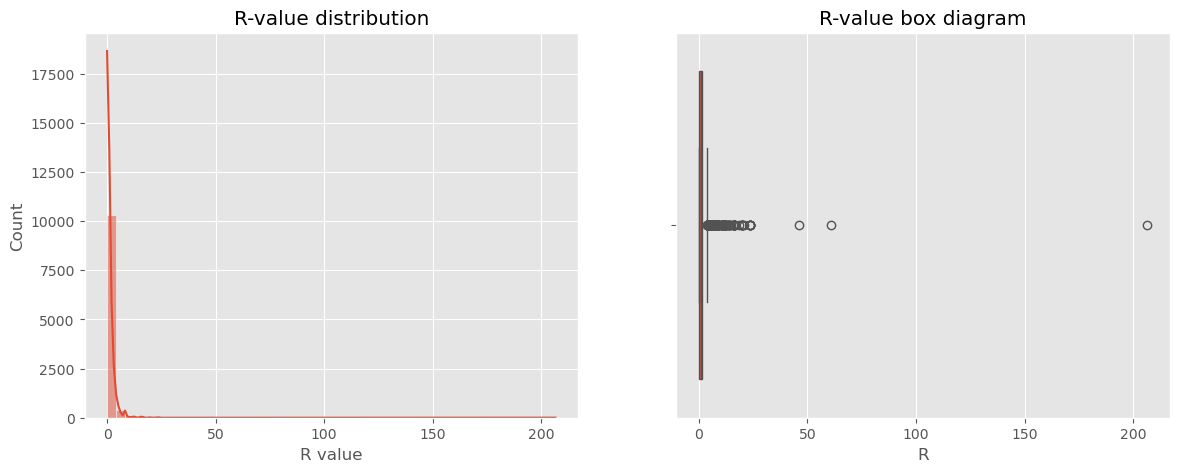

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of R values
plt.style.use("ggplot")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
sns.histplot(df["R"], bins=50, kde=True, ax=axes[0])
axes[0].set_title("R-value distribution")
axes[0].set_xlabel("R value")

# Boxplot
sns.boxplot(x=df["R"], ax=axes[1])
axes[1].set_title("R-value box diagram")

plt.show()


The R-value represents the infection rate, showing how contagious the virus was in different regions of Los Angeles. The histogram shows that most R-values are between 0 and 5, with a right-skewed distribution, indicating a few high infection rates in certain areas. The boxplot confirms this, with many values clustered below 5 but several extreme outliers above 50, and even exceeding 200. These outliers suggest localized outbreaks or superspreader events. Most areas had relatively low infection rates, but a few regions experienced much higher transmission, which may be linked to population density, public behavior, or policy changes.

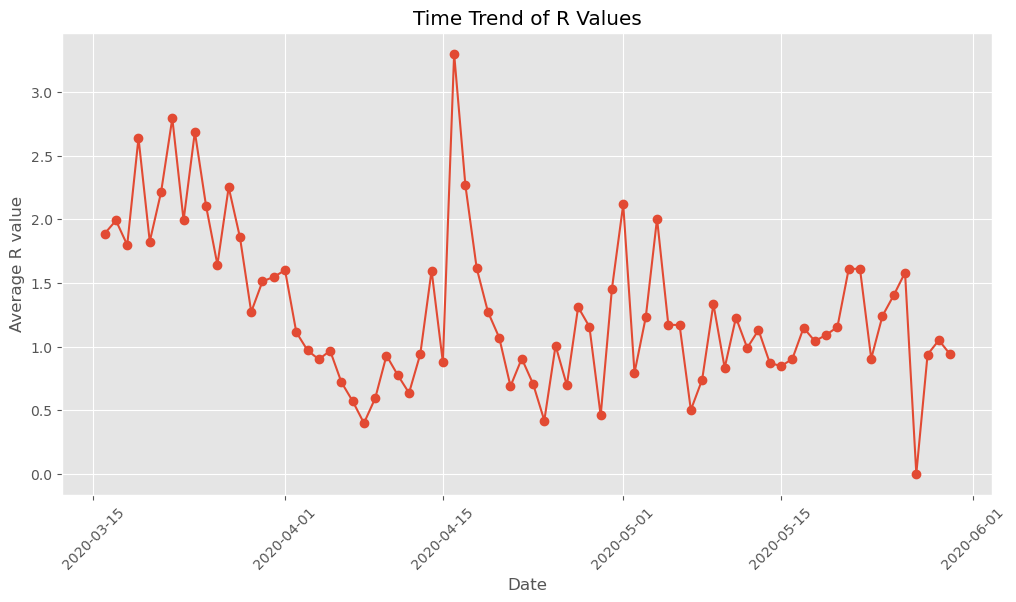

In [17]:
# Time trend analysis of R values
plt.figure(figsize=(12, 6))
df_grouped = df.groupby("Time Stamp")["R"].mean()

plt.plot(df_grouped.index, df_grouped.values, marker="o", linestyle="-")
plt.xlabel("Date")
plt.ylabel("Average R value")
plt.title("Time Trend of R Values")

plt.xticks(rotation=45)
plt.show()


The line chart shows the trend of average infection rates over time in Los Angeles. Initially, the rates fluctuates around 2, indicating active transmission. A decline follows, suggesting a slowdown in infections, possibly due to interventions or behavior changes. Around mid-April, a sharp peak appears, likely indicating a localized outbreak or increased mobility. After this peak, the R value drops again, but fluctuations remain, showing that transmission varied over time. The overall trend suggests waves of infection influenced by external factors such as policy changes, public behavior, and testing availability.

/tmp/ipykernel_297/1096860159.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_regions.values, y=top_regions.index, palette="viridis")


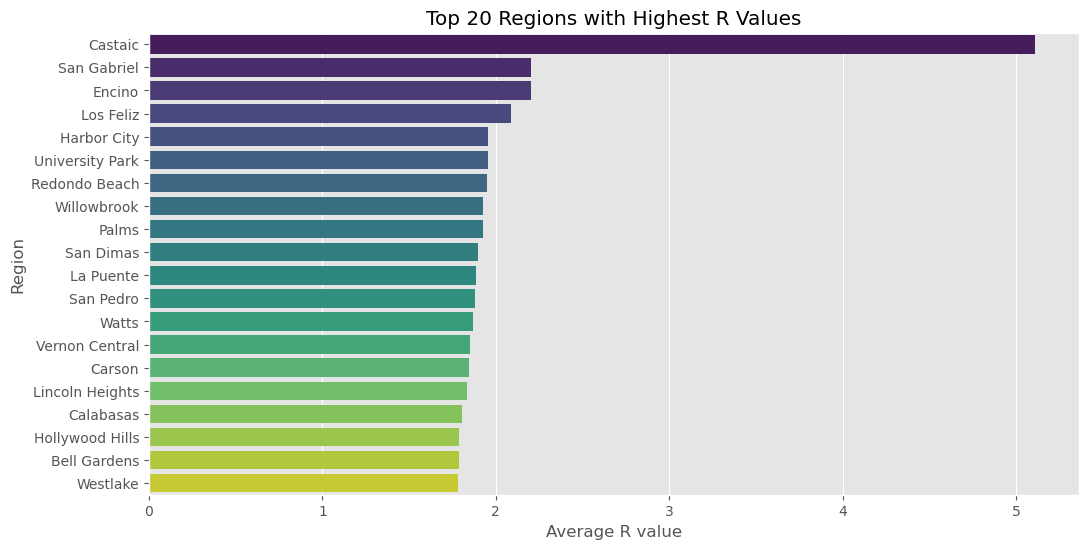

In [18]:
# Top 20 regions with highest R values
top_regions = df.groupby("Region")["R"].mean().sort_values(ascending=False).head(20)  # 选前20个

plt.figure(figsize=(12, 6))
sns.barplot(x=top_regions.values, y=top_regions.index, palette="viridis")
plt.xlabel("Average R value")
plt.ylabel("Region")
plt.title("Top 20 Regions with Highest R Values")

plt.show()


This bar chart shows the top 20 regions in Los Angeles with the highest average infection rates. Castaic has the highest infection rate, followed by San Gabriel, Encino, and Los Feliz. The variation in infection rates suggests that some areas experienced faster virus transmission than others. Possible reasons include population density, public compliance with health measures, local policies, or outbreak events. Identifying high-risk regions helps in targeting interventions and allocating healthcare resources efficiently.

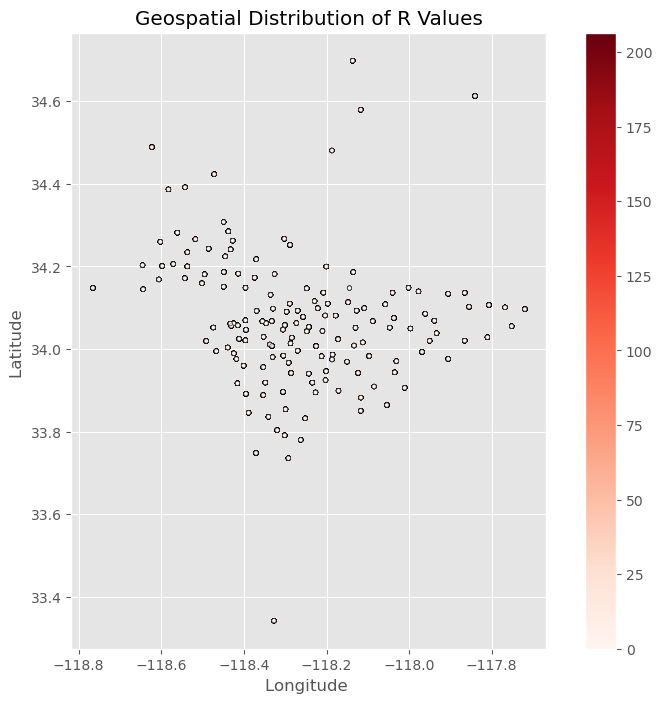

In [19]:
import geopandas as gpd
from shapely.geometry import Point

# Geospatial distribution of R values
geometry = [Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)
fig, ax = plt.subplots(figsize=(10, 8))
geo_df.plot(column="R", cmap="Reds", alpha=0.6, edgecolor="k", legend=True, markersize=10, ax=ax)

plt.title("Geospatial Distribution of R Values")
plt.xlabel("Longitude ")
plt.ylabel("Latitude ")
plt.show()


In [9]:
# Load the new dataset
new_file_path = "Covid-19-aggregated.csv"
df_new = pd.read_csv(new_file_path)

# Display basic information about the dataset
df_new.info(), df_new.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57892 entries, 0 to 57891
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time Stamp       57892 non-null  object 
 1   Region           57892 non-null  object 
 2   Latitude         57892 non-null  float64
 3   Longitude        57892 non-null  float64
 4   Number of cases  57892 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 2.2+ MB


(None,
    Time Stamp         Region   Latitude   Longitude  Number of cases
 0  03-16-2020       Alhambra  34.093042 -118.127060                2
 1  03-16-2020        Arcadia  34.136208 -118.040150                1
 2  03-16-2020  Beverly Hills  34.069650 -118.396306                1
 3  03-16-2020  Boyle Heights  34.043689 -118.209768                5
 4  03-16-2020         Carson  33.832204 -118.251755                1)

In [10]:
# Convert Time Stamp to datetime format
df_new["Time Stamp"] = pd.to_datetime(df_new["Time Stamp"], format="%m-%d-%Y")

# Check for missing values
missing_values_new = df_new.isnull().sum()

# Descriptive statistics for numerical variables
num_summary_new = df_new.describe()

# Count unique regions
cat_summary_new = df_new["Region"].nunique()

# Display results
df_new.info(), missing_values_new, num_summary_new, cat_summary_new



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57892 entries, 0 to 57891
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Time Stamp       57892 non-null  datetime64[ns]
 1   Region           57892 non-null  object        
 2   Latitude         57892 non-null  float64       
 3   Longitude        57892 non-null  float64       
 4   Number of cases  57892 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 2.2+ MB


(None,
 Time Stamp         0
 Region             0
 Latitude           0
 Longitude          0
 Number of cases    0
 dtype: int64,
                           Time Stamp      Latitude     Longitude  \
 count                          57892  57892.000000  57892.000000   
 mean   2020-07-21 12:08:48.321702656     34.059398   -118.171996   
 min              2020-03-16 00:00:00     33.275839   -118.806179   
 25%              2020-05-22 00:00:00     33.983069   -118.396467   
 50%              2020-07-22 00:00:00     34.053691   -118.292293   
 75%              2020-09-20 00:00:00     34.136119   -118.168259   
 max              2020-11-19 00:00:00     34.882980    -96.991881   
 std                              NaN      0.166608      1.392177   
 
        Number of cases  
 count     57892.000000  
 mean        605.775444  
 min           0.000000  
 25%          45.000000  
 50%         212.000000  
 75%         705.000000  
 max        8015.000000  
 std         964.485053  ,
 246)

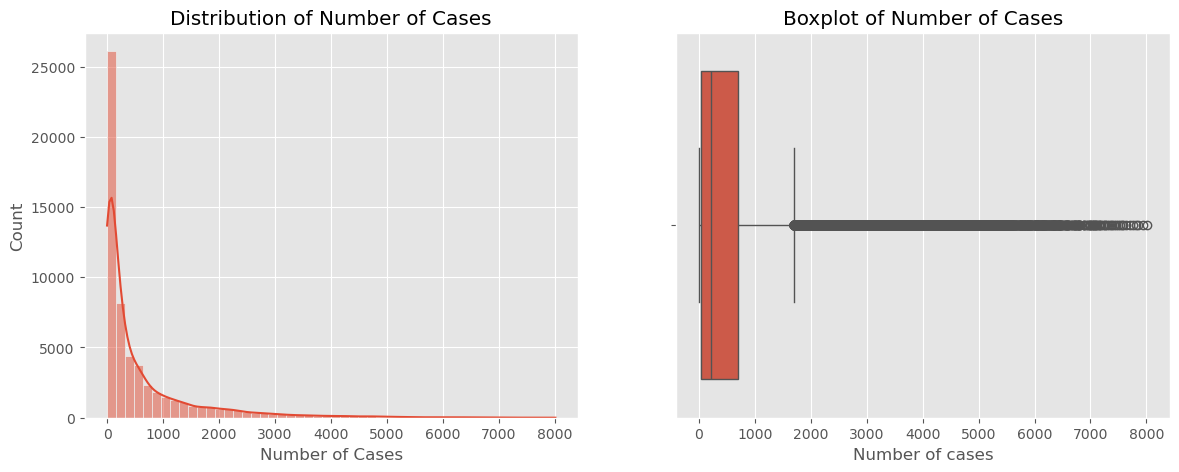

In [11]:
# Plot the distribution of Number of cases
plt.style.use("ggplot")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
sns.histplot(df_new["Number of cases"], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Number of Cases")
axes[0].set_xlabel("Number of Cases")

# Boxplot
sns.boxplot(x=df_new["Number of cases"], ax=axes[1])
axes[1].set_title("Boxplot of Number of Cases")

plt.show()


The histogram shows the distribution of covid-19 case numbers in Los Angeles, where most cases are concentrated at lower values, with a few extreme cases creating a right-skewed distribution. This suggests that while many regions had relatively low case counts, some areas experienced significantly higher infections. The boxplot further confirms this, showing a high number of outliers, indicating that certain regions had much larger case numbers than the majority. This variation could be influenced by factors like population density, healthcare access, and local policies.

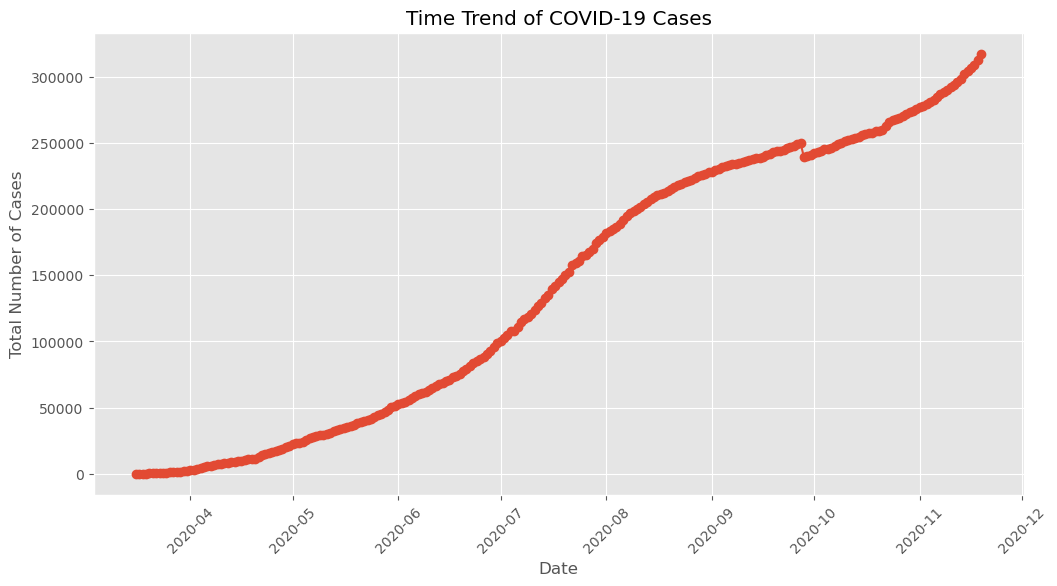

In [12]:
# Time trend analysis of Number of cases
plt.figure(figsize=(12, 6))
df_grouped_new = df_new.groupby("Time Stamp")["Number of cases"].sum()

plt.plot(df_grouped_new.index, df_grouped_new.values, marker="o", linestyle="-")
plt.xlabel("Date")
plt.ylabel("Total Number of Cases")
plt.title("Time Trend of COVID-19 Cases")

plt.xticks(rotation=45)
plt.show()


The chart shows the cumulative number of covid-19 cases in Los Angeles over time. The total cases steadily increase, with a more rapid rise starting around mid-2020, suggesting accelerating transmission. The trend indicates ongoing virus spread, with no clear decline, implying that containment measures may not have been fully effective. The curve’s shape reflects periods of faster and slower growth, possibly due to policy changes, public behavior, or testing capacity.

/tmp/ipykernel_297/711820742.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_regions_new.values, y=top_regions_new.index, palette="viridis")


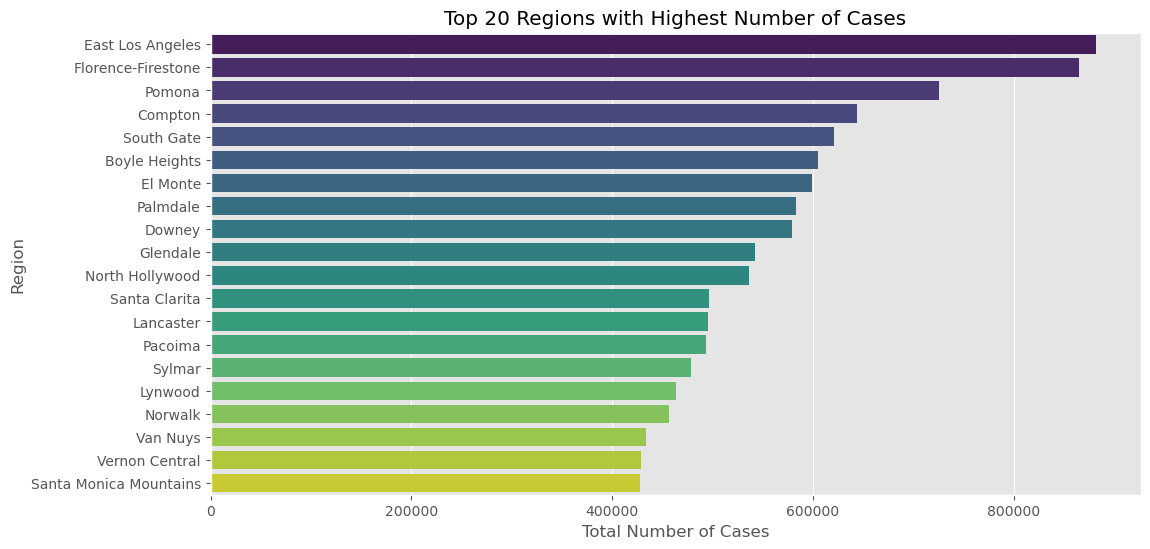

In [15]:
# Top 20 regions with highest number of cases
top_regions_new = df_new.groupby("Region")["Number of cases"].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_regions_new.values, y=top_regions_new.index, palette="viridis")
plt.xlabel("Total Number of Cases")
plt.ylabel("Region")
plt.title("Top 20 Regions with Highest Number of Cases")

plt.show()
